#**Loan Default Data**

The Data is from Kaggle

#**Business Problem**

Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

#**Data Dictionary**

The features for the dataset is as follwing:
#####**ID**:ID number of loan applicants
#####**Year**: Year that the applicants applied for the loan
#####**Loan Limits**: cf and ncf
#####**Gender**: Male, Female, Joint, or Sex Not Available
#####**Approv_in_adv**: nopre, pre
#####**Loan_type**: type1, 2, 3
#####**Loan_purpose**: p1, 2, 3, 4
#####**Credit_worthiness**: L1, L2
#####**Open_credit**: no nopen credit, open credit
#####**Business_or_commercial**: not b/c, b/c
#####**Loan_amount**: money loaned to applicants
#####**Rate_of_interest**: interest rate of loans
#####**Interest_rate_spread**: IRS
#####**Upfront_charges**: Charges
#####**term**: loan term in days
#####**Neg_ammortization(paying less than interest)**: not_neg, neg_amm
#####**Interest_Only**: not_int, int_only
#####**lump_sum_payment**: not_lpsm, lpsm
#####**property_value**: property value
#####**construction_type**: sb
#####**occupancy_type**: pr, sr
#####**secured_by**: home
#####**total_units**: 1U, 2U, 3U, 4U
#####**income**: income of applicants
#####**Credit_type**: EQUI, EXP, CRIF, CIB
#####**Credit_score**: credit scores of applicants
#####**Co-applicant_credit_type**: CIB, EXP
#####**Age**: age range
#####**submission_of_application**: to_inst, not_inst
#####**LTV**: LTV
#####**Region**: south, north, central
#####**Security_type**: direct, indirect
#####**Status**: 1 for default, 0 for no-default
#####**dtir1**: integer value

# **Import Library**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
import seaborn as sns
from datetime import datetime

In [ ]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
!pip install psynlig 
from psynlig import pca_explained_variance_bar

     |████████████████████████████████| 2.8 MB 23.4 MB/s 
     |████████████████████████████████| 6.5 MB 27.8 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=af30703d9b673398ba4cb875c0d25934f58af1ac2e776ae15b880d962fd814fe
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sphinx-gallery: filename=sphinx_gallery-0.10.1-py3-none-any.whl size=132569 sha256=89146073f3a43286179adb22dcab7d0373ec88e92c6085df24dcb3e7a06b0a57
  Stored in directory: /root/.cache/pip/wheels/52/72/6f/d5817eb58b7f5a43cc40b0186bbfa9ce3ea9cdbd9881c7cd50
Successfully built adjustText sphinx-gallery


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 11.9 MB/s 


In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 34.0 MB 1.4 MB/s 
     |████████████████████████████████| 13.1 MB 48.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=992970a049b59610f0e8ae17de6139c128926aaedb0f6fd70bb28cc222a6582b
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#**Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read 
file_ = "/content/drive/MyDrive/Colab Notebooks/WOW/Loan_Default.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file
df = df.drop(['ID','year'],axis =1)

#**EDA**

In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (148670, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammort

Number of missing Values by Feature
 loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV               

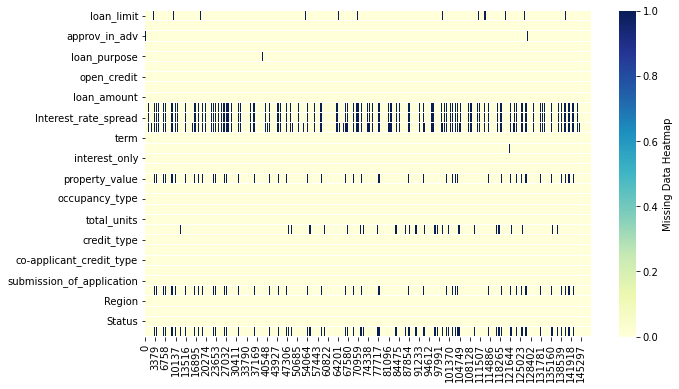

In [ ]:
# Missing Values
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)
# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()
#impute median missing value

In [ ]:
# Duplicates
duplicates_count = df.duplicated().sum()
print('No. of dups:',duplicates_count)
duplicates_rows = df[df.duplicated(keep = 'last')] # Note that the last one is kept.
print('Instances that are  duplicates:\n ',duplicates_rows)


No. of dups: 0
Instances that are  duplicates:
  Empty DataFrame
Columns: [loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, loan_amount, rate_of_interest, Interest_rate_spread, Upfront_charges, term, Neg_ammortization, interest_only, lump_sum_payment, property_value, construction_type, occupancy_type, Secured_by, total_units, income, credit_type, Credit_Score, co-applicant_credit_type, age, submission_of_application, LTV, Region, Security_Type, Status, dtir1]
Index: []

[0 rows x 32 columns]


In [ ]:
# Compute the number of unique values in each feature (includes NaNs)
df.nunique()

loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
Interest_rate_spread         22516
Upfront_charges              58271
term                            26
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 385
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                        1001
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_application        2
LTV                           8484
Region              

In [ ]:
# Separate categoricals and quants
# Note: features that would otherwise be categrical, but have more than five categories, will be label encoded and handled as quant features 
quants = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','income','Credit_Score','LTV']
dummies = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose','Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment','construction_type','occupancy_type','Region','total_units','age','submission_of_application','Security_Type']
labels = ['credit_type','co-applicant_credit_type','term']
target = ['Status']

print('Target feature',target)
print('Quant features: ',quants)
print('Features for dummy encoding ',dummies)
print('Features for labels encoding ',labels)

Target feature ['Status']
Quant features:  ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV']
Features for dummy encoding  ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Region', 'total_units', 'age', 'submission_of_application', 'Security_Type']
Features for labels encoding  ['credit_type', 'co-applicant_credit_type', 'term']


In [ ]:
# Assess skewness of quants
df[quants].skew()
skew_cols = []
for col in quants:
  if (df[col].skew() > 1.0) or (df[col].skew() < -1):
    skew_cols.append(col)
print("Features requiring skewness correction: ",skew_cols)

Features requiring skewness correction:  ['loan_amount', 'Upfront_charges', 'property_value', 'income', 'LTV']


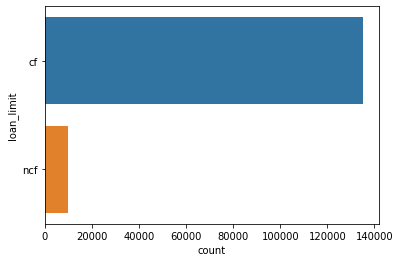

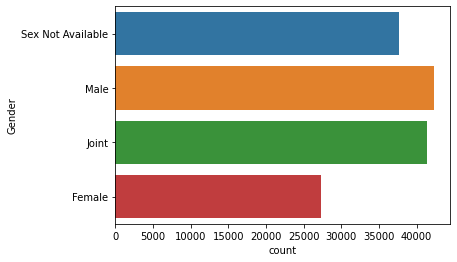

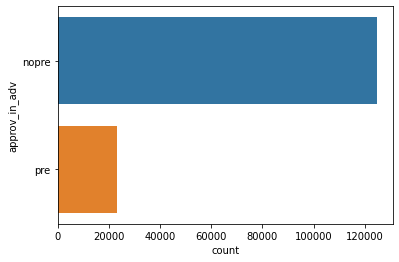

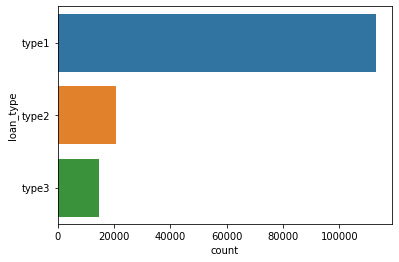

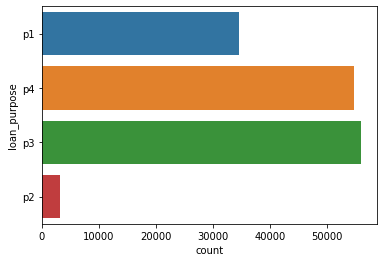

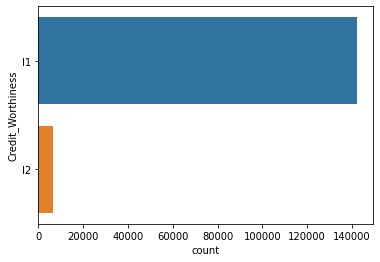

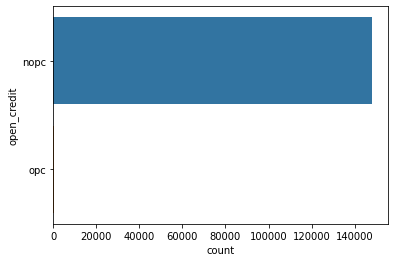

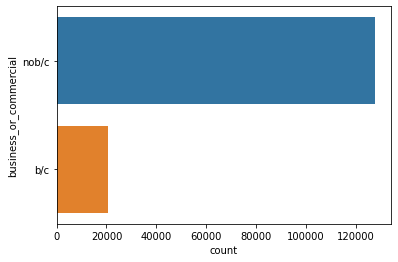

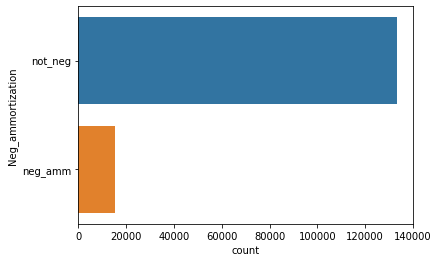

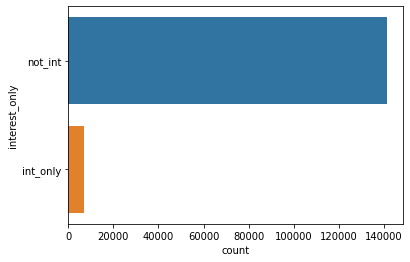

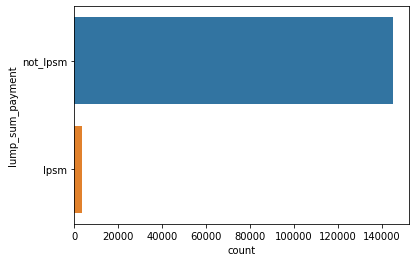

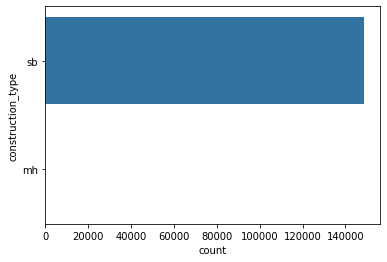

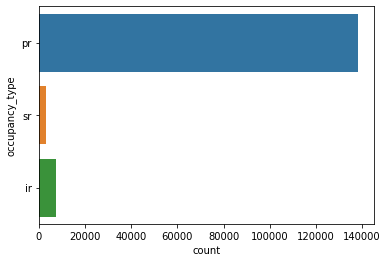

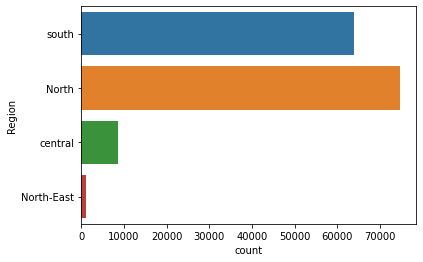

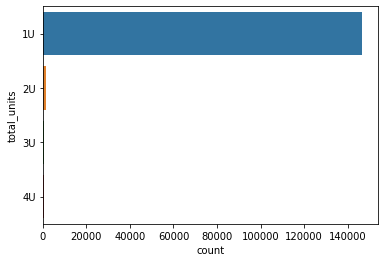

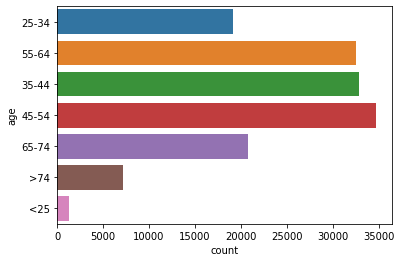

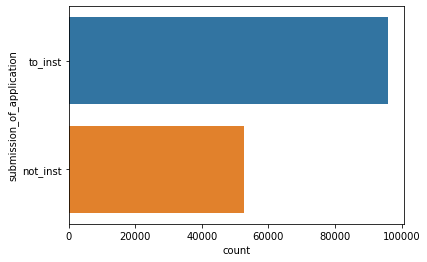

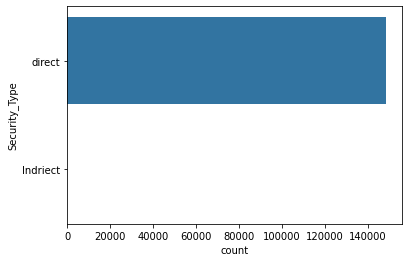

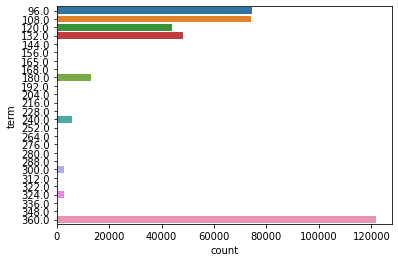

In [ ]:
# Bar chart dummies
for col in dummies:
    sns.countplot(data=df,y=col)
    plt.show()
# Bar chart labels
for col in labels:
    sns.countplot(data=df,y=col)

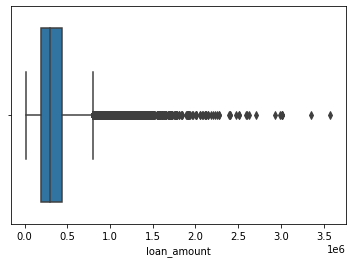

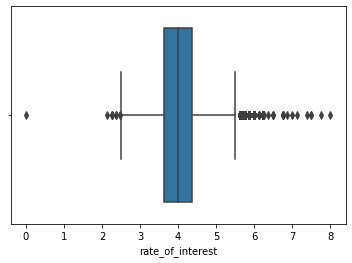

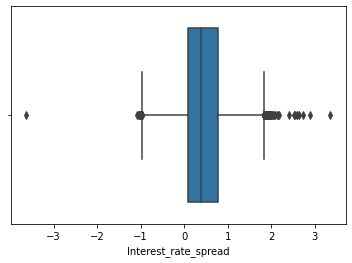

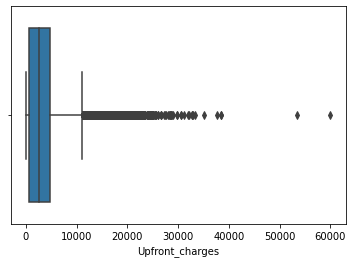

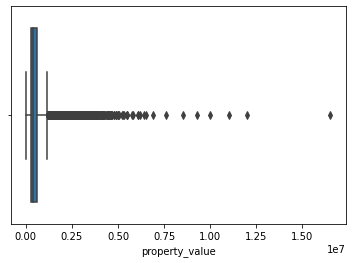

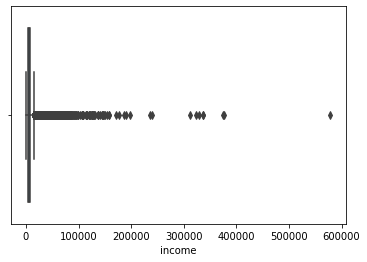

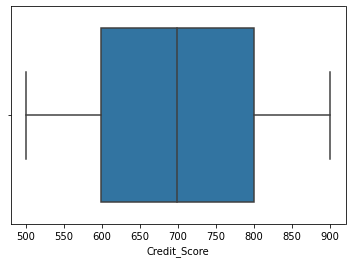

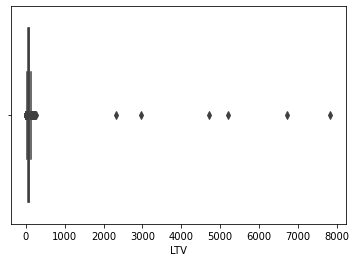

In [ ]:
# Boxplot the quants to detect outliers
for col in quants:
    sns.boxplot(data=df,x=col)
    plt.show()

In [ ]:
# Pairplot the quants
# if len(quants) > 0:
#     sns.pairplot(df[quants])
# else:
#     print("No quant variables")

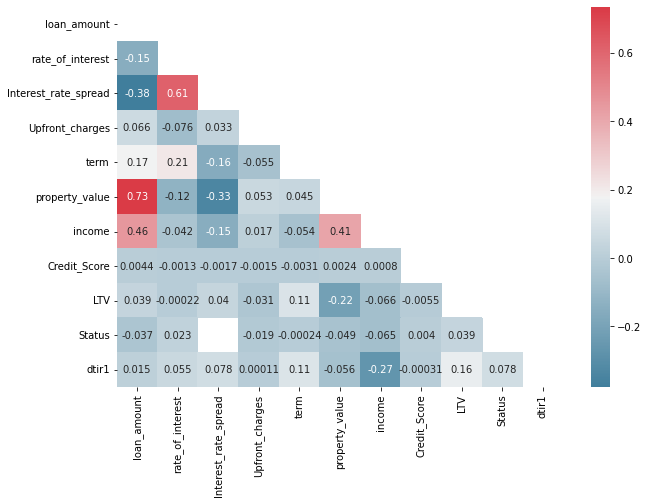

In [ ]:
#Correlation heatmap
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
#Summary
print('SUMMARY\n')
print('1. Columns with NaNs:',columns_with_NaNs)
print('2. Instances that are  duplicates:\n ',duplicates_rows)
print('3. Quantitative features: ',quants)
print('4. Target feaure',target)
print('5. Original fetatures that are dummy encoded ',dummies)
print('6. Original features that are label encoded ',labels)
print("7. Quant features requiring skewness correction: ",skew_cols)
print('8. Review boxplots for possible outliers in quant features')

SUMMARY

1. Columns with NaNs: ['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'property_value', 'income', 'age', 'submission_of_application', 'LTV', 'dtir1']
2. Instances that are  duplicates:
  Empty DataFrame
Columns: [loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, loan_amount, rate_of_interest, Interest_rate_spread, Upfront_charges, term, Neg_ammortization, interest_only, lump_sum_payment, property_value, construction_type, occupancy_type, Secured_by, total_units, income, credit_type, Credit_Score, co-applicant_credit_type, age, submission_of_application, LTV, Region, Security_Type, Status, dtir1]
Index: []

[0 rows x 32 columns]
3. Quantitative features:  ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV']
4. Target feaure ['Status']
5. Original 

#**Pre-Processing**

In [ ]:
# replacing missing values 

df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].median())
df['Interest_rate_spread'] = df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median())
df['Upfront_charges'] = df['Upfront_charges'].fillna(df['Upfront_charges'].median())
df['term'] = df['term'].fillna(df['term'].median())
df['property_value'] = df['property_value'].fillna(df['property_value'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['LTV'] = df['LTV'].fillna(df['LTV'].median())
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].median())

df.isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region                          0
Security_Type 

In [ ]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

In [ ]:
#dummy encoding
df = pd.get_dummies(data = df, columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose','Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment','construction_type','occupancy_type','Region','total_units','age','submission_of_application','Security_Type','Secured_by'],drop_first=True)

In [ ]:
#label encoding
from sklearn import preprocessing
print(df.head(5),'\n\n\n')
print(df.info)

label_encoder = preprocessing.LabelEncoder()
for i in ['credit_type','co-applicant_credit_type','term']:
  df[i]= label_encoder.fit_transform(df[i])
  df[i].unique()
df.head(5)

   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500              3.99                0.3904          2596.45   
1       206500              3.99                0.3904          2596.45   
2       406500              4.56                0.2000           595.00   
3       456500              4.25                0.6810          2596.45   
4       696500              4.00                0.3042             0.00   

    term  property_value   income credit_type  Credit_Score  \
0  360.0        118000.0   1740.0         EXP           758   
1  360.0        418000.0   4980.0        EQUI           552   
2  360.0        508000.0   9480.0         EXP           834   
3  360.0        658000.0  11880.0         EXP           587   
4  360.0        758000.0  10440.0        CRIF           602   

  co-applicant_credit_type  ...  total_units_4U  age_35-44  age_45-54  \
0                      CIB  ...               0          0          0   
1                      E

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  term  \
0       116500              3.99                0.3904          2596.45    24   
1       206500              3.99                0.3904          2596.45    24   
2       406500              4.56                0.2000           595.00    24   
3       456500              4.25                0.6810          2596.45    24   
4       696500              4.00                0.3042             0.00    24   

   property_value   income  credit_type  Credit_Score  \
0        118000.0   1740.0            3           758   
1        418000.0   4980.0            2           552   
2        508000.0   9480.0            3           834   
3        658000.0  11880.0            3           587   
4        758000.0  10440.0            1           602   

   co-applicant_credit_type  ...  total_units_4U  age_35-44  age_45-54  \
0                         0  ...               0          0          0   
1                         1  ...               0          0          0   
2                         0  ...               0          1          0   
3                         0  ...               0          0          1   
4                         1  ...               0          0          0   

   age_55-64  age_65-74  age_<25  age_>74  submission_of_application_to_inst  \
0          0          0        0        0                                  1   
1          1          0        0        0                                  1   
2          0          0        0        0                                  1   
3          0          0        0        0                                  0   
4          0          0        0        0                                  0   

   Security_Type_direct  Secured_by_land  
0                     1                0  
1                     1                0  
2                     1                0  
3                     1                0  
4                     1                0  

[5 rows x 47 columns]

In [ ]:
df

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0            116500             3.990                0.3904          2596.45   
1            206500             3.990                0.3904          2596.45   
2            406500             4.560                0.2000           595.00   
3            456500             4.250                0.6810          2596.45   
4            696500             4.000                0.3042             0.00   
...             ...               ...                   ...              ...   
148665       436500             3.125                0.2571          9960.00   
148666       586500             5.190                0.8544             0.00   
148667       446500             3.125                0.0816          1226.64   
148668       196500             3.500                0.5824          4323.33   
148669       406500             4.375                1.3871          6000.00   

        term  property_value   income  credit_type  Credit_Score  \
0         24        118000.0   1740.0            3           758   
1         24        418000.0   4980.0            2           552   
2         24        508000.0   9480.0            3           834   
3         24        658000.0  11880.0            3           587   
4         24        758000.0  10440.0            1           602   
...      ...             ...      ...          ...           ...   
148665     8        608000.0   7860.0            0           659   
148666    24        788000.0   7140.0            0           569   
148667     8        728000.0   6900.0            0           702   
148668     8        278000.0   7140.0            3           737   
148669    13        558000.0   7260.0            0           830   

        co-applicant_credit_type  ...  total_units_4U  age_35-44  age_45-54  \
0                              0  ...               0          0          0   
1                              1  ...               0          0          0   
2                              0  ...               0          1          0   
3                              0  ...               0          0          1   
4                              1  ...               0          0          0   
...                          ...  ...             ...        ...        ...   
148665                         1  ...               0          0          0   
148666                         0  ...               1          0          0   
148667                         1  ...               0          0          1   
148668                         1  ...               0          0          0   
148669                         0  ...               0          0          1   

        age_55-64  age_65-74  age_<25  age_>74  \
0               0          0        0        0   
1               1          0        0        0   
2               0          0        0        0   
3               0          0        0        0   
4               0          0        0        0   
...           ...        ...      ...      ...   
148665          1          0        0        0   
148666          0          0        0        0   
148667          0          0        0        0   
148668          1          0        0        0   
148669          0          0        0        0   

        submission_of_application_to_inst  Security_Type_direct  \
0                                       1                     1   
1                                       1                     1   
2                                       1                     1   
3                                       0                     1   
4                                       0                     1   
...                                   ...                   ...   
148665                                  1                     1   
148666                                  0                     1   
148667                                  0                     1   
148668    

#**Skewness Correction**

In [ ]:
df.skew()

loan_amount                            1.677463
rate_of_interest                       0.531245
Interest_rate_spread                   0.401238
Upfront_charges                        2.194068
term                                  -2.157635
property_value                         4.896602
income                                18.143188
credit_type                            0.314882
Credit_Score                           0.005893
co-applicant_credit_type               0.001792
LTV                                  126.471061
Status                                 1.186073
dtir1                                 -0.662068
loan_limit_ncf                         3.439015
Gender_Joint                           0.984395
Gender_Male                            0.954088
Gender_Sex Not Available               1.138237
approv_in_adv_pre                      1.861391
loan_type_type2                        2.095348
loan_type_type3                        2.669823
loan_purpose_p2                        6

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF

In [ ]:
df = skew_autotransform(df.copy(deep=True), include=['loan_amount', 'Upfront_charges', 'property_value', 'income', 'LTV'], plot = False, exp = False, threshold = 1)

#**Tukey**

Column  loan_amount :  [132, 196, 254, 316, 319, 691, 1487, 1650, 1656, 2162, 2258, 2302, 2593, 2885, 2947, 2948, 2984, 3028, 3379, 3611, 3627, 3660, 3858, 4127, 4134, 4176, 4198, 4208, 5312, 5382, 5470, 5794, 6790, 7112, 7282, 7508, 7629, 7852, 8340, 8438, 8669, 8727, 8832, 9044, 9499, 9797, 10389, 10830, 11523, 11653, 11774, 11788, 11899, 11991, 12848, 13013, 13160, 13334, 13513, 13677, 13782, 14101, 14141, 14699, 15036, 15377, 15452, 15600, 15838, 16128, 16181, 16596, 16886, 17270, 17445, 17470, 17541, 18177, 18403, 18647, 18766, 19515, 19620, 21158, 21231, 21395, 21536, 22442, 22757, 22927, 22945, 23107, 23306, 23480, 23838, 23857, 23933, 24682, 25218, 25560, 25798, 26178, 26323, 26523, 27383, 27501, 27569, 27669, 27914, 28275, 28751, 29342, 29418, 29446, 29671, 29775, 30072, 30286, 30970, 31008, 31124, 31357, 31667, 31935, 31949, 32050, 32217, 32247, 32763, 33005, 33022, 33153, 33532, 33649, 33681, 33760, 34395, 34795, 34951, 35224, 35388, 35596, 35674, 35806, 35884, 35942, 37326,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Column  Region_south :  []
Column  total_units_2U :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Descriptive Statistics Before          loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  143983.000000     143983.000000         143983.000000    143983.000000   
mean       83.061267          4.027587              0.426660        35.342695   
std        11.825135          0.489740              0.446424        18.389425   
min        39.213260          0.000000             -3.638000        -2.332919   
25%        74.818454          3.750000              0.178100        30.055841   
50%        83.084645          3.990000              0.390400        39.321796   
75%        91.643321          4.250000              0.617100        45.564845   
max       155.220305          8.000000              3.357000       119.412162   

                term  property_value         income    credit_type  \
count  143983.000000   143983.000000  143983.000000  143983.000000   
mean       21.755846       15.575086      56.295697       1.333532   
std         5.247942        0.

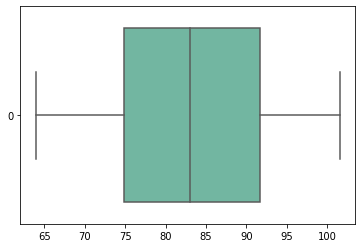

Column  rate_of_interest


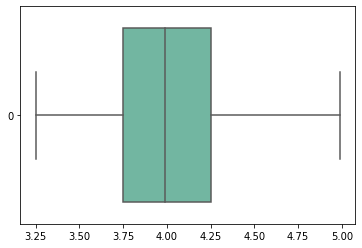

Column  Interest_rate_spread


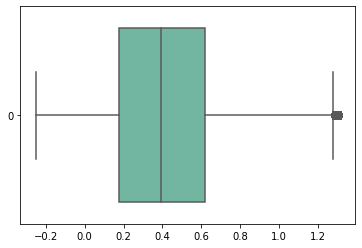

Column  Upfront_charges


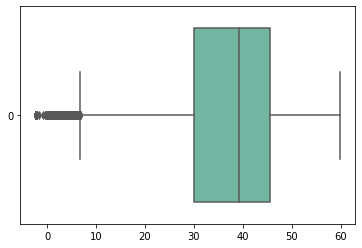

Column  term


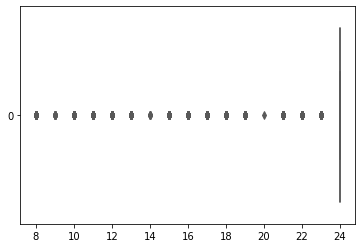

Column  property_value


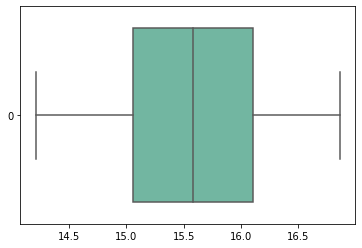

Column  income


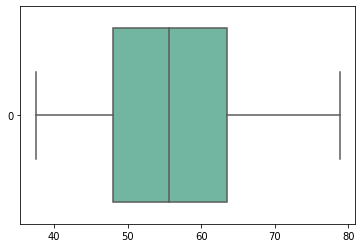

Column  credit_type


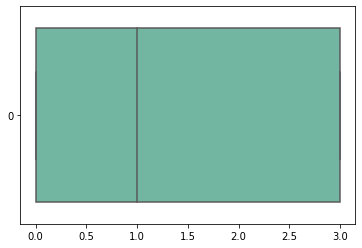

Column  Credit_Score


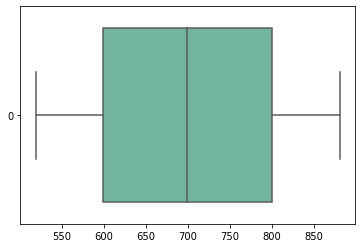

Column  co-applicant_credit_type


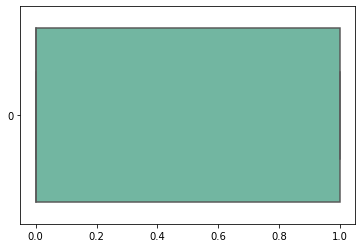

Column  LTV


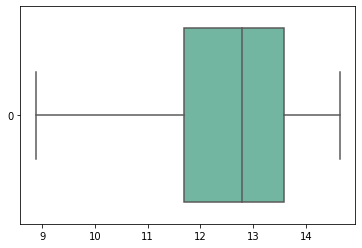

Column  dtir1


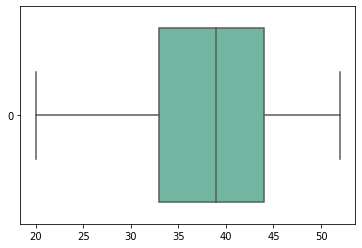

Column  loan_limit_ncf


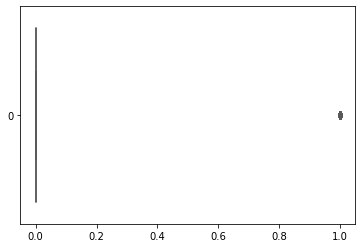

Column  Gender_Joint


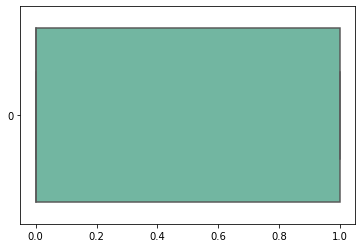

Column  Gender_Male


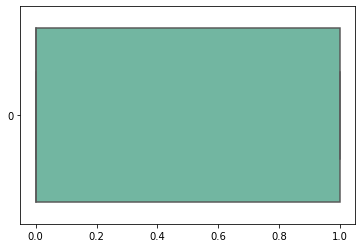

Column  Gender_Sex Not Available


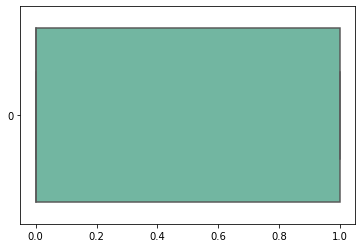

Column  approv_in_adv_pre


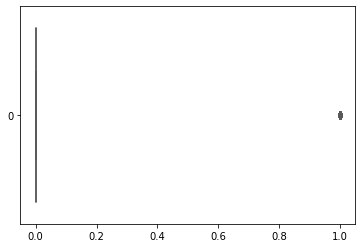

Column  loan_type_type2


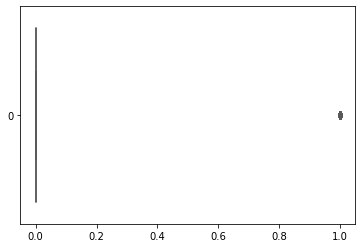

Column  loan_type_type3


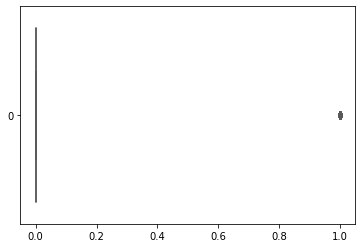

Column  loan_purpose_p2


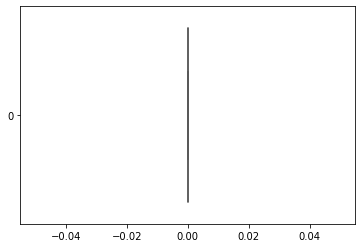

Column  loan_purpose_p3


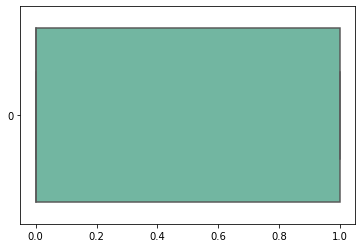

Column  loan_purpose_p4


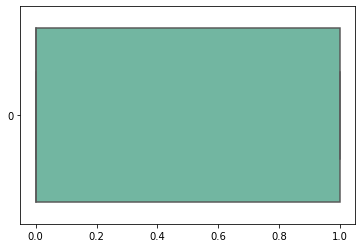

Column  Credit_Worthiness_l2


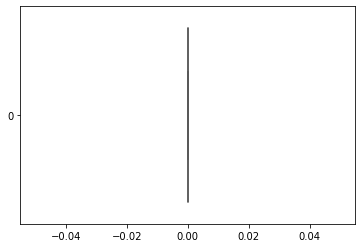

Column  open_credit_opc


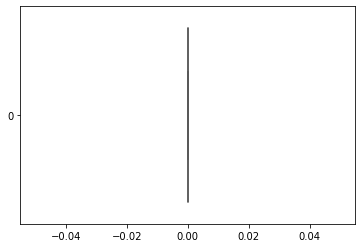

Column  business_or_commercial_nob/c


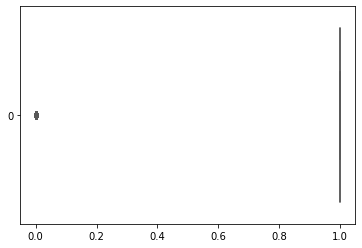

Column  Neg_ammortization_not_neg


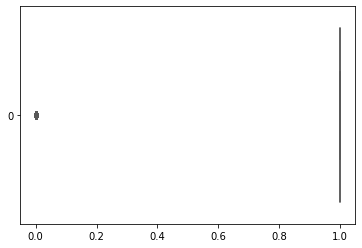

Column  interest_only_not_int


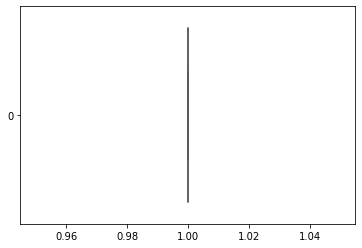

Column  lump_sum_payment_not_lpsm


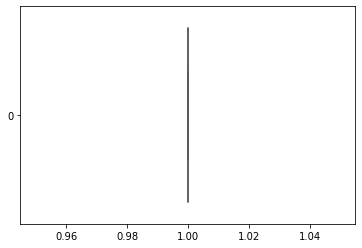

Column  construction_type_sb


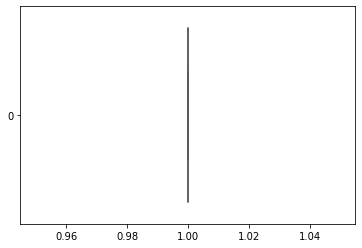

Column  occupancy_type_pr


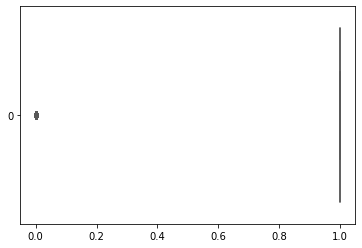

Column  occupancy_type_sr


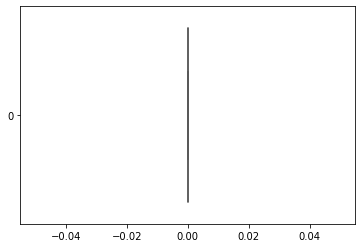

Column  Region_North-East


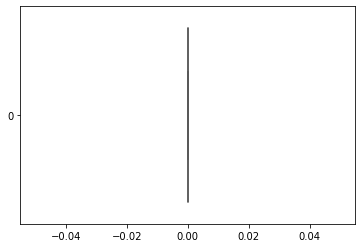

Column  Region_central


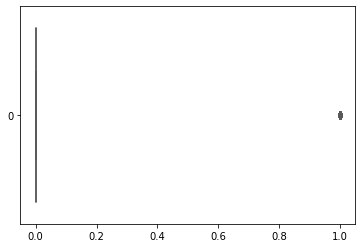

Column  Region_south


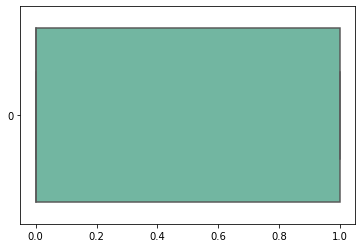

Column  total_units_2U


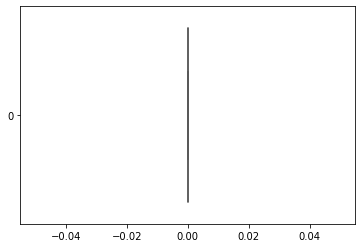

Column  total_units_3U


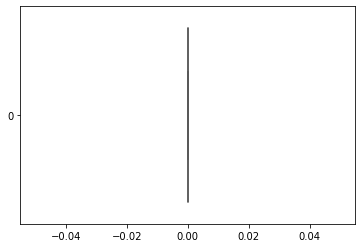

Column  total_units_4U


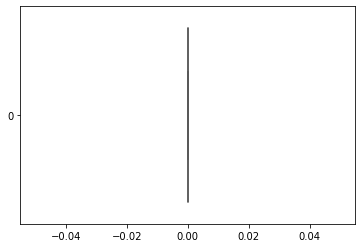

Column  age_35-44


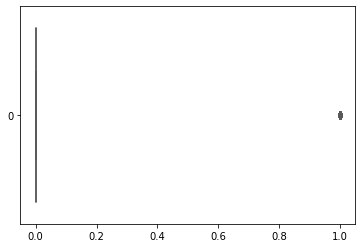

Column  age_45-54


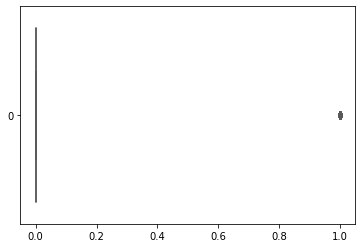

Column  age_55-64


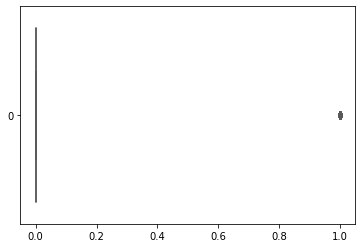

Column  age_65-74


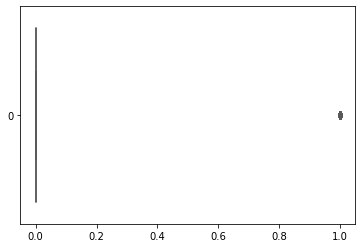

Column  age_<25


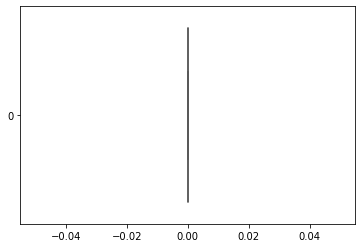

Column  age_>74


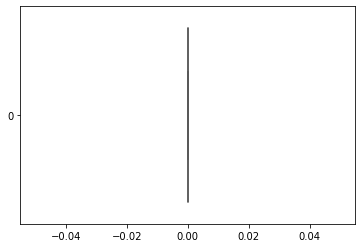

Column  submission_of_application_to_inst


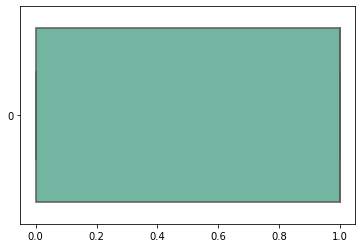

Column  Security_Type_direct


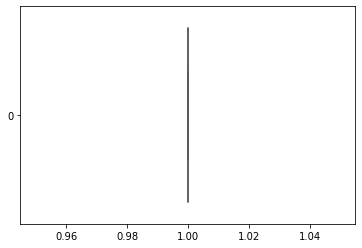

Column  Secured_by_land


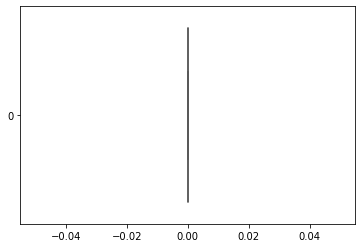

In [ ]:
# X = df.drop(['Status'],axis=1)
# y = df['Status']
cols = X.columns
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Descriptive Statistics Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("Descriptive Statistics After", X_winsorized.describe())
for i in cols:
  print("Column ",i)
  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")
  plt.show()

#**Split Data**

In [ ]:
X = df.drop(['Status'],axis=1)
y = df['Status']
df.head()

loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  term  \
0    65.434636              3.99                0.3904        39.321796    24   
1    75.772745              3.99                0.3904        39.321796    24   
2    90.006788              4.56                0.2000        22.722094    24   
3    92.687543              4.25                0.6810        39.321796    24   
4   103.112263              4.00                0.3042        -2.332919    24   

   property_value     income  credit_type  Credit_Score  \
0       13.802241  35.699387            3           758   
1       15.584606  52.747307            2           552   
2       15.865033  66.716994            3           834   
3       16.239459  72.403709            3           587   
4       16.445352  69.093149            1           602   

   co-applicant_credit_type  ...  total_units_4U  age_35-44  age_45-54  \
0                         0  ...               0          0          0   
1                         1  ...               0          0          0   
2                         0  ...               0          1          0   
3                         0  ...               0          0          1   
4                         1  ...               0          0          0   

   age_55-64  age_65-74  age_<25  age_>74  submission_of_application_to_inst  \
0          0          0        0        0                                  1   
1          1          0        0        0                                  1   
2          0          0        0        0                                  1   
3          0          0        0        0                                  0   
4          0          0        0        0                                  0   

   Security_Type_direct  Secured_by_land  
0                     1                0  
1                     1                0  
2                     1                0  
3                     1                0  
4                     1                0  

[5 rows x 47 columns]

In [ ]:
X = X[['Upfront_charges','Interest_rate_spread','rate_of_interest']]

In [ ]:
X.columns

Index(['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest'], dtype='object')

In [ ]:
X.describe()

Upfront_charges  Interest_rate_spread  rate_of_interest
count    143983.000000         143983.000000     143983.000000
mean         35.342695              0.426660          4.027587
std          18.389425              0.446424          0.489740
min          -2.332919             -3.638000          0.000000
25%          30.055841              0.178100          3.750000
50%          39.321796              0.390400          3.990000
75%          45.564845              0.617100          4.250000
max         119.412162              3.357000          8.000000

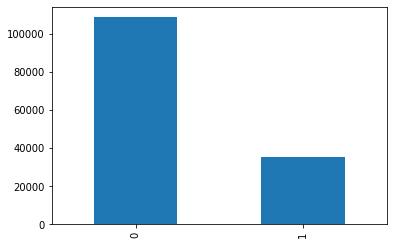

In [ ]:
y.describe()
df['Status'].value_counts().plot.bar()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
print('Training Data Predictors\n',X_train.head(), '\nTraining Data Target\n',y_train.head(),'\n')
print('Test Data Predictors\n',X_test.head(), '\nTest Data Target\n',y_test.head())

Training Data Predictors
         Upfront_charges  Interest_rate_spread  rate_of_interest
16920         40.637827                0.0051             3.125
104287        39.321796                0.3904             3.990
81593         39.321796                0.3904             3.990
77471         14.799260               -0.2220             3.000
119640        51.965231                0.0268             3.990 
Training Data Target
 16920     0
104287    1
81593     1
77471     0
119640    0
Name: Status, dtype: int64 

Test Data Predictors
         Upfront_charges  Interest_rate_spread  rate_of_interest
102317        54.935290               -0.1194             3.990
24399         48.637134                0.0528             2.990
125556        47.109717                0.3916             4.250
23750         -2.332919               -0.2148             4.180
72800         49.039783                0.3278             3.875 
Test Data Target
 102317    0
24399     0
125556    0
23750     0
72800

#**SMOTE**

In [ ]:
# SMOTE (oversampling)
import numpy as np
from numpy import mean
from numpy import std
import imblearn                                                      # Import the imblearn package. sklearn does not feature SMOTE
from imblearn.over_sampling import SMOTE                             # Import SMOTE

sm = SMOTE(random_state=12346)                                       # Create an instance of SMOTE
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)     # Apply the SNOTE intance to the training data

print("Shape before SMOTE: ", X_train.shape, y_train.shape)          # Verify the shape has changed and is now balanced.
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape)
print("Mean of target: ",mean(y_train_SMOTE))

Shape before SMOTE:  (115186, 3) (115186,)
Shape after SMOTE:  (174008, 3) (174008,)
Mean of target:  0.5


#**Standardization**

In [ ]:
# Standardize
mmsc = StandardScaler()                                   # Create an instance of MinMaxScaler
X_train_SMOTE_std = mmsc.fit_transform(X_train_SMOTE)   # Uses .fit_transform to compute the mean and standard deviaton of training dataset and to use those statistics to nromalize the training data
X_test_std = mmsc.transform(X_test)                     # Uses .transform to apply the training set transformation to the test set. This way both datasets are normalized similarly, but 
                                                        # no information from the test set is leaked back into the training set.

#**LGBM Feature Importance**

<BarContainer object of 3 artists>

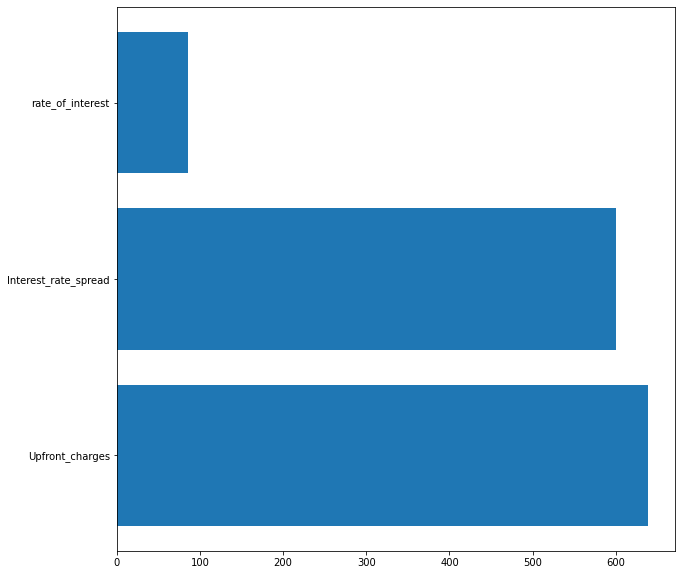

In [ ]:
# Feature Importance
# Code adapted from this source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Let's try to weed out the really poor predictors
from matplotlib import pyplot                            # Import pyplot (to be able generate the barchart later in this snippet)
model = LGBMClassifier()                         # Create an instance of a RandomForestClassifier
# fit the model
model.fit(X_train_SMOTE_std, y_train_SMOTE)                  # Fit the RandomForest instance using the traiing data
# get importance 
importance = model.feature_importances_                  # The RandomForestClassifier instance computes feature importance as a bonus. Store them imprtance values in importance'.
# summarize feature importance
col_names = X.columns
fig = plt.figure(figsize = (10,10))
plt.barh(col_names, model.feature_importances_)    

#**Model Creation**

In [ ]:
# X = X[['Upfront_charges','Interest_rate_spread','rate_of_interest','property_value','credit_type','dtir1','LTV','Neg_ammortization_not_neg','lump_sum_payment_not_lpsm']]

In [ ]:
# X = X[['Upfront_charges','Interest_rate_spread','rate_of_interest']]

In [ ]:
X.columns

Index(['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest'], dtype='object')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 15 23:12:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring = 'roc_auc_score',
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print('Scores:',test_scores_mean,test_scores_std)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(20, 20))

title = "Learning Curves (Logistic Regression (Logit))"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# estimator = kNeighborsClassifier()
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)


title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', DecisionTreeClassifier()]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)


title = "Learning Curves (Support Vector Machine)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', SVC()]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 2], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()
 
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

title = "Learning Curves (XGBoost)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', XGBClassifier(random_state=11)]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)


title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
#estimator = RandomForestClassifier()
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', RandomForestClassifier()]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)


title = "Learning Curves (LightGBM)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# estimator = LGBMClassifier()
estimator = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['classifier', LGBMClassifier()]])
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 2], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()

###*Grid Search for DT*

In [ ]:
# Build DT classifer on dataset
from sklearn.metrics import confusion_matrix                                # Import confusion_matrix method from sklearn
from sklearn import metrics                                                 # Import metrics from sklearn
DTmodel = DecisionTreeClassifier()                                            # Create a LGBMClassifier
model.fit(X_train_SMOTE_std,y_train_SMOTE)                                  # Fit the revised training data (i.e., the training data has only five features)
y_pred = model.predict(X_test_std)                                          # Use model to predict target values for test predictors
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))              # print confusion matrix using sklearn 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)       # Compute true positive rate and false positive rate using the roc_curve method
print('AUC: ', metrics.auc(fpr, tpr))                                       # Compute and print the area under the ROC curve, AUC


Confusion matrix: 
 [[21708     1]
 [    0  7088]]
AUC:  0.9999769680777557


###*Grid Search for LGBM*

In [ ]:
# Create an LGBM pipeline with SMOTE and StandardScaler and then gridsearch it using five cross-validation folds 
lgbmmodel = imbpipeline([
        ('sample', SMOTE(random_state=123)),
        ('std', StandardScaler()),
        ('clf', LGBMClassifier(boosting_type='gbdt', objective='binary', learning_rate=0.1, bagging_fraction=0.9))])

param_grid = {'clf__learning_rate':[.05,.1,.15],
              'clf__bagging_fraction':[.1,.3,.5,.7,.9],
              }
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring = 'roc_auc')
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
# Build Random Forest classifer on revised dataset
from sklearn.metrics import confusion_matrix                                # Import confusion_matrix method from sklearn
from sklearn import metrics                                                 # Import metrics from sklearn
lgbmmodel = LGBMClassifier()                                            # Create a LGBMClassifier
lgbmmodel.fit(X_train_SMOTE_std,y_train_SMOTE)                                  # Fit the revised training data (i.e., the training data has only five features)
y_pred = lgbmmodel.predict(X_test_std)                                          # Use model to predict target values for test predictors
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))              # print confusion matrix using sklearn 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)       # Compute true positive rate and false positive rate using the roc_curve method
print('AUC: ', metrics.auc(fpr, tpr))                                       # Compute and print the area under the ROC curve, AUC


Confusion matrix: 
 [[21708     1]
 [    0  7088]]
AUC:  0.9999769680777557


###*Propensities*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Get started with LGBM classifier
clm = LGBMClassifier(bagging_fraction = 0.1, learning_rate =0.05)

clm.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y_pred = clm.predict(X_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y_test,y_pred), ' recall =', recall_score(y_test, y_pred),' accuracy = ', accuracy_score(y_test, y_pred))    # Test set accuracy
print(confusion_matrix(y_true=y_test,y_pred=y_pred))                           # Confusion matrix
# print("Logit Model Coefficients",list(clm.coef_))                # Logistic coefficients (can be used to assess which variables have the largest effect size in the model)


Logit: AUC =  0.9999769680777557  recall = 1.0  accuracy =  0.9999652741605028
[[21708     1]
 [    0  7088]]


In [ ]:
# Examine propensities of logit model
lgbm_propensities = pd.DataFrame(clm.predict_proba(X_test_std)) 

# Create a dataframe showing actuals, predicted, and propensities 
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, lgbm_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(lgbm_propensities[1])):
  if((lgbm_propensities.loc[i,1] >= lower_limit) & (lgbm_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(lgbm_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies


Percentage of test instances with propensity in [0.30, 0.70]: 0.00
Instances for which actual and predicted differ:


Actual  Predicted  Propensity
25276       0          1     0.99669

In [ ]:
results

Actual  Predicted  Propensity
0           0          0     0.00331
1           0          0     0.00331
2           0          0     0.00331
3           0          0     0.00331
4           0          0     0.00331
...       ...        ...         ...
28792       0          0     0.00331
28793       0          0     0.00331
28794       0          0     0.00331
28795       0          0     0.00331
28796       0          0     0.00331

[28797 rows x 3 columns]

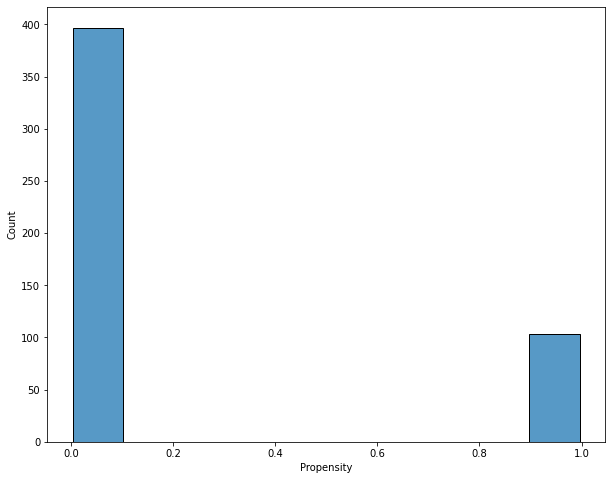

In [ ]:
sns.histplot(results['Propensity'].sample(500))

###*Permutation Feature Importance*


In [ ]:
Xcols = X.columns
col_names = X.columns

Text(0.5, 0, 'Permutation Importance')

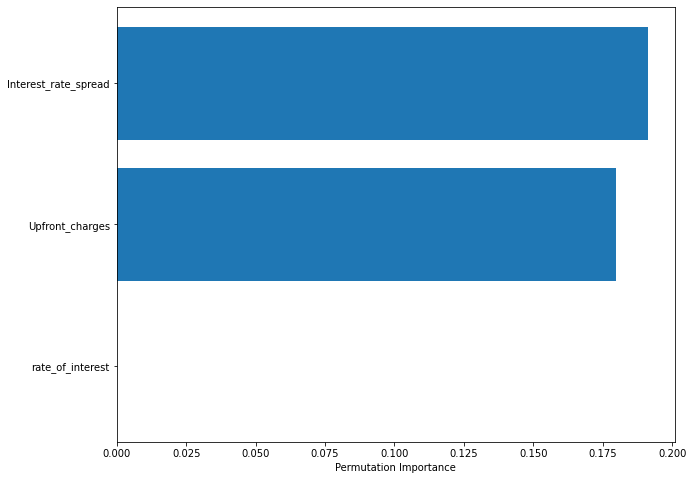

In [ ]:
# Assess features important for predictions in the wild
from sklearn.inspection import permutation_importance
plt.rcParams["figure.figsize"] = (10,8)
perm_importance = permutation_importance(lgbmmodel, X_test_std, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(Xcols[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

###*Shapley Values*

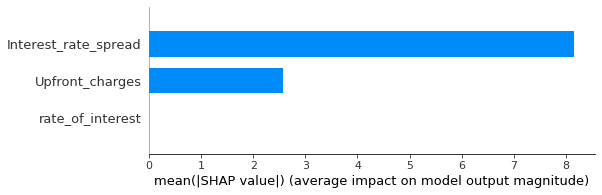

In [ ]:
explainer = shap.TreeExplainer(lgbmmodel)
shap_values = explainer.shap_values(X_train_SMOTE_std)
shap.summary_plot(shap_values[1], X_train_SMOTE_std, plot_type='bar',feature_names=col_names)

###*PDP Plots*

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


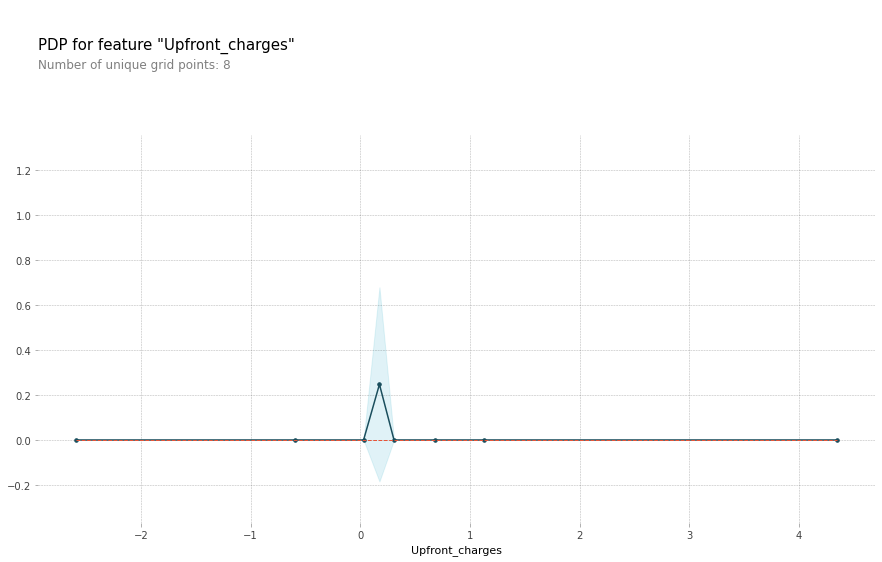

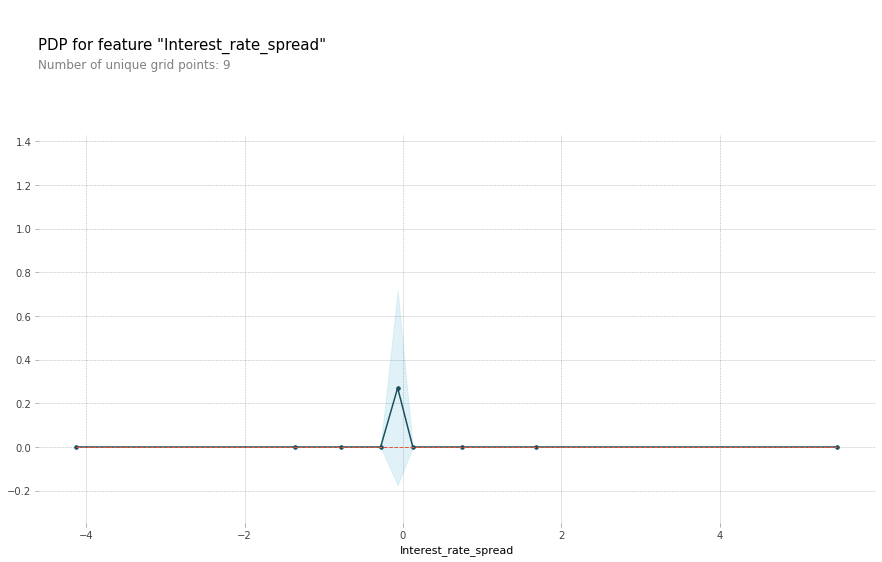

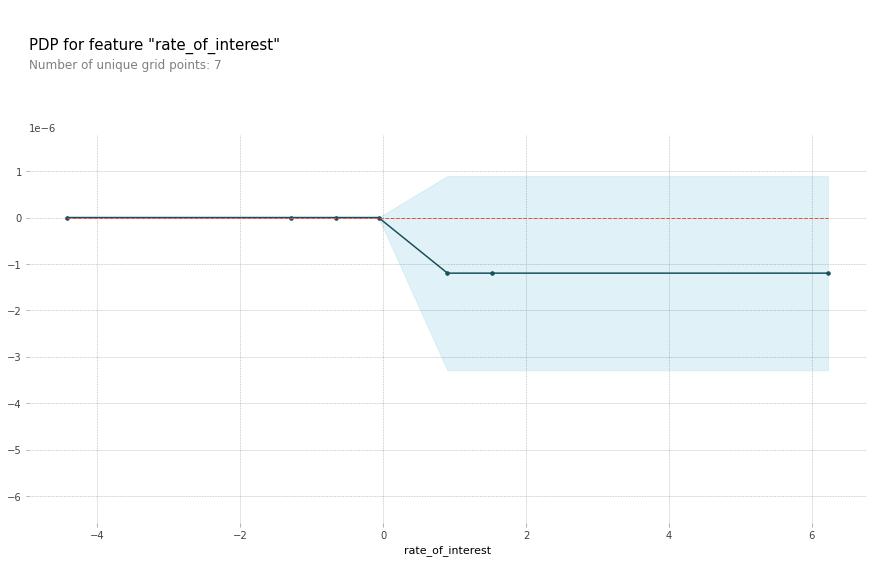

In [ ]:
# Univariate Partial Dependence Plot
X_test_std=pd.DataFrame(X_test_std)
X_test_std.columns=col_names
for i in col_names:    
    pdp_ = pdp.pdp_isolate(model = model, dataset = X_test_std, model_features=col_names, feature = i)
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

###*Surrogate Model*

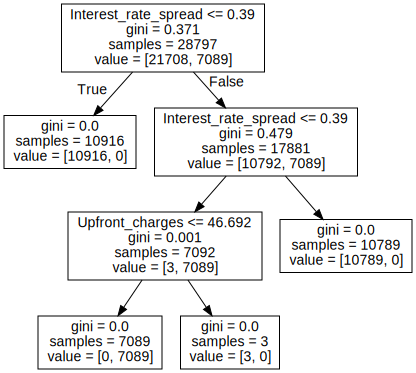

In [ ]:
# Decision Tree surrogate model of Random Forest model
# Mimics the beahvior of the black box model on data from the wild (i.e., the test set)
from sklearn import tree
import graphviz

proxy = DecisionTreeClassifier(random_state = 20850,max_depth=3)    # Control the depth of the proxy tree here
proxy.fit(X_test,y_pred)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = col_names)
graphviz.Source(tree_graph)

In [ ]:
# How good is this surrogate decision tree model? 
# Let's find out by computing the correlation between the predictions of the original model and the surrogate model
y_proxy = proxy.predict(X_test) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)
print('Correlation coefficient of RF predictions and Surrogate Model predictions: ',y_pred.corrwith(y_proxy,axis=0))

Correlation coefficient of RF predictions and Surrogate Model predictions:  0    1.0
dtype: float64


In [ ]:
clm

LGBMClassifier(bagging_fraction=0.1, learning_rate=0.05)

correlation of surrogate model and LGBM